In [1]:
import numpy as np
vel_train=np.load('/home/airl/auvnav/sn-mnn-auv-nav/dataset/TrainAndValidation/V.npy')
vel_test=np.load('/home/airl/auvnav/sn-mnn-auv-nav/dataset/Test/V_test.npy')
imu_train=np.load('/home/airl/auvnav/sn-mnn-auv-nav/dataset/TrainAndValidation/IMU_in.npy')
imu_test=np.load('/home/airl/auvnav/sn-mnn-auv-nav/dataset/Test/IMU_in_test.npy')
print(vel_test.shape,vel_train.shape,imu_train.shape,imu_test.shape)
vel_train[0,:]

(3, 2001) (3, 13886) (3, 1388600, 2) (3, 200100, 2)


array([ 0.404004,  0.50526 ,  0.362068, ...,  0.151458,  0.328499,
       -0.058332])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
T=100
print(len(imu_train[0, :, 0]) // T)
X_acc = np.zeros((len(imu_train[0, :, 0])//T, 3))
Z = np.zeros((len(imu_train[0, :, 0]) // T, 3))
n=0
vel_train=vel_train.transpose()

for t in range(0, len(imu_train[0, :, 0]) - 1, T):
    X_acc[n,:]=(imu_train[:,t, 0])
    z = vel_train[n, :]
    Z[n, :] = z
    n=n+1
    
#print(imu_train[:,0:100,0])
df=pd.DataFrame(Z)
print(df)
#print(X_acc)
#pd.DataFrame(X_acc.reshape(X_acc.shape[0],X_acc.shape[1]))
# vel_train=pd.DataFrame(imu_train.T)
# vel_test=pd.DataFrame(vel_test.T)
# vel_train.info()
# imu_train=pd.DataFrame(imu_train.T)
# imu_test=pd.DataFrame(imu_test.T)
# u=vel_train[float(0)]
# v=vel_train[float(1)]
# w=vel_train[float(2)]
# plt.figure(0)
# plt.plot(u)
# plt.figure(1)
# plt.plot(v)
# plt.figure(2)
# plt.plot(w)
# print(u)
# print(v)
# print(w)


ImportError: cannot import name 'docstring' from 'matplotlib' (/home/airl/.local/lib/python3.10/site-packages/matplotlib/__init__.py)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dvl=pd.read_excel('/home/pramuk/IISC/AUV- Snapir/Tedelyne DVL/teledyne_navigator_measurements.xlsx')
dvl.info()

FileNotFoundError: [Errno 2] No such file or directory: '/home/pramuk/IISC/AUV- Snapir/Tedelyne DVL/teledyne_navigator_measurements.xlsx'

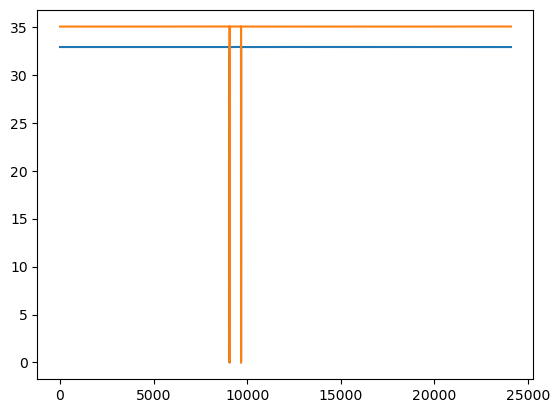

In [ ]:
dvl= dvl[(dvl.longitute!='U') & (dvl.latitude!='U') & (dvl.u!='U') & (dvl.v!='U') & (dvl.w!='U')]
#dvl= dvl[dvl.latitude!='U']
x=dvl['latitude']
y=dvl['longitute']
t=dvl['Time']
plt.plot(x)
plt.plot(y)

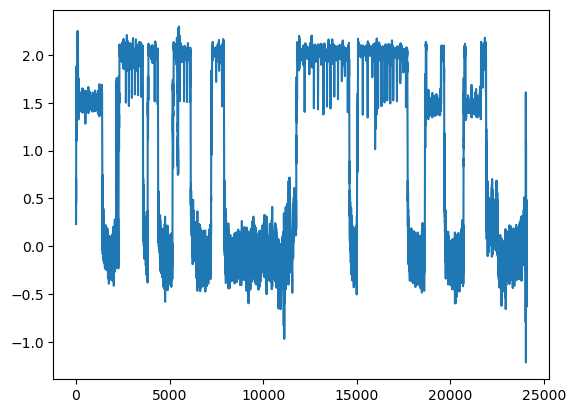

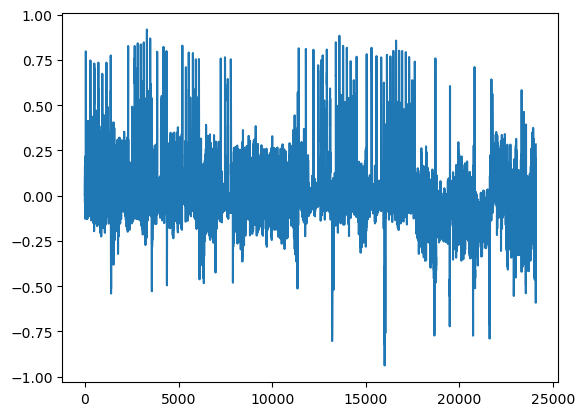

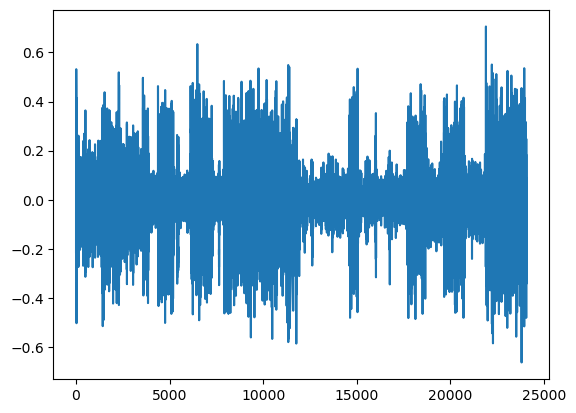

In [ ]:
u=dvl['u']
v=dvl['v']
w=dvl['w']
plt.figure(0)
plt.plot(u)
plt.figure(1)
plt.plot(v)
plt.figure(2)
plt.plot(w)


In [1]:
pred=pd.read_csv('/home/pramuk/IISC/predictions.csv')
X_gyro = np.zeros((len(imu_train[0, :, 0]) // T, 3))
X_acc = np.zeros((len(imu_train[0, :, 0]) // T, 3))
Y = np.zeros((len(imu_train[0, :, 0]) // T, 4))
Z = np.zeros((len(imu_train[0, :, 0]) // T, 3))

n = 0
V = vel_train.transpose()

for t in range(0, len(imu_train[0, :, 0]) - 1, T):
    X_acc[n, :] = imu_train[:, t, 0]
    X_gyro[n, :] = imu_train[:, t, 1]
    #Y[n, :] = y
    z = V[n, :]
    Z[n, :] = z
    n = n + 1
print(Z)
plt.figure(0)
plt.plot(range(0,500),pred['0'].iloc[10250:10750])
plt.plot(Z[10250:10750,0],)
plt.legend(['predicted x','true x'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(x component) (m/s)")
plt.figure(1)
plt.plot(range(0,500),pred['1'].iloc[10250:10750])
plt.plot(range(0,500),Z[10250:10750,1])
plt.legend(['predicted y','true y'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(y component) (m/s)")
plt.figure(2)
plt.plot(range(0,500),pred['2'].iloc[10250:10750])
plt.plot(Z[10250:10750,2],)
plt.legend(['predicted z','true z'])
plt.xlabel("Time");plt.ylabel("Predcition and Desired speed(z component) (m/s)")

NameError: name 'pd' is not defined